In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
x = np.arange(1, 11)
y = 7*x + 5 + 7 * np.random.randn(10)

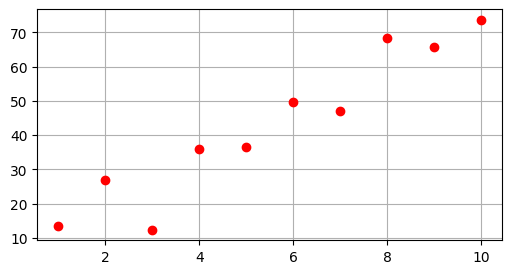

In [9]:
plt.figure(figsize=(6, 3))
plt.plot(x, y, 'ro')
plt.grid()
plt.show()

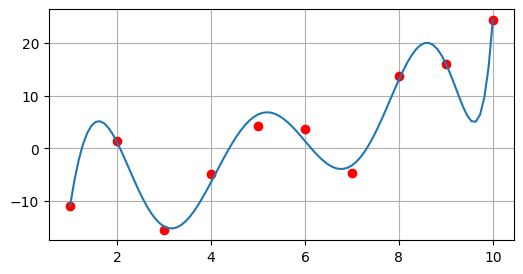

In [33]:
x = np.arange(1, 11)
y = x**2 - 7*x + 5 + 7 * np.random.randn(10)

kertoimet = np.polyfit(x, y, 8)
p = np.poly1d(kertoimet)
xx = np.linspace(1, 10, 100)
yy = p(xx)

plt.figure(figsize=(6, 3))
plt.plot(x, y, 'ro')
plt.plot(xx, yy)
plt.grid()
plt.show()

In [34]:
S = np.sqrt(np.sum((p(x) - y))**2)
S

4.3441579222758264e-09

Training set and test set

In [36]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
X = iris.drop(columns=['species'])
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=203)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(f'Accuracy of kNN classifier on the test set: {accuracy_test: .2f}')

Accuracy of kNN classifier on the test set:  0.96


In [43]:
#cross-validation

In [ ]:
X = iris.drop(columns=['species'])
y = iris['species']
knn = KNeighborsClassifier(n_neighbors=3)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=20, scoring='accuracy')

scores

array([1.        , 1.        , 0.875     , 1.        , 1.        ,
       1.        , 0.875     , 1.        , 1.        , 1.        ,
       0.71428571, 0.85714286, 1.        , 1.        , 0.85714286,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [47]:
avg_accuracy = np.mean(scores)
print(f'Average accuracy on kNN classifier using 10-fold cross-validation: {avg_accuracy:.2f}')

Average accuracy on kNN classifier using 10-fold cross-validation: 0.96
